In [ ]:
# First version is w/o augments, second one has augments

In [3]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
BATCH_SIZE = 32

# sanity check
print(tf.__version__)

emotion_map = {
  '0' : 'Anger',
  '1' : 'Disgust',
  '2' : 'Fear',
  '3' : 'Happiness',
  '4' : 'Sadness',
  '5' : 'Surprise',
  '6' : 'Neutral',
  '7' : 'Contempt'
}

dataset_path = '../../datasets/CK+/'

# Load the raw data
train_data_raw = pd.read_csv(f'{dataset_path}train.csv')
test_data_raw = pd.read_csv(f'{dataset_path}test.csv')

train_data, val_data = train_test_split(train_data_raw, test_size=0.1, random_state=np.random.randint(1000))

# Create a data generator to load data without augmentation
def data_generator(data, batch_size=32):
    while True:
        for start in range(0, len(data), batch_size):
            end = min(start + batch_size, len(data))
            batch_data = data[start:end]
            batch_features = []
            batch_labels = []
            for _, row in batch_data.iterrows():
                img = np.array(row['pixels'].split(), 'float32').reshape(48, 48)
                img /= 255.0
                img_expanded = np.expand_dims(img, axis=-1)
                img_rgb = np.repeat(img_expanded, 3, axis=-1)
                batch_features.append(img_rgb)
                batch_labels.append(row['emotion'])
            yield np.stack(batch_features), to_categorical(batch_labels, num_classes=len(emotion_map))

# Initialize the train generator
train_generator = data_generator(train_data, batch_size=BATCH_SIZE)
val_generator = data_generator(val_data, batch_size=BATCH_SIZE)

print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")

2.17.0
Training set size: 660
Validation set size: 74


In [12]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
BATCH_SIZE = 32

# sanity check
print(tf.__version__)

emotion_map = {
  '0' : 'Anger',
  '1' : 'Disgust',
  '2' : 'Fear',
  '3' : 'Happiness',
  '4' : 'Sadness',
  '5' : 'Surprise',
  '6' : 'Neutral',
  '7' : 'Contempt'
}

dataset_path = '../../datasets/CK+/'

# Load the raw data
train_data_raw = pd.read_csv(f'{dataset_path}train.csv')
test_data_raw = pd.read_csv(f'{dataset_path}test.csv')

train_data, val_data = train_test_split(train_data_raw, test_size=0.1, random_state=np.random.randint(1000))

# Create a data generator to load data without augmentation
def data_generator(data, batch_size=32):
    while True:
        for start in range(0, len(data), batch_size):
            end = min(start + batch_size, len(data))
            batch_data = data[start:end]
            batch_features = []
            batch_labels = []
            for _, row in batch_data.iterrows():
                img = np.array(row['pixels'].split(), 'float32').reshape(48, 48)
                img /= 255.0
                img_expanded = np.expand_dims(img, axis=-1)
                img_rgb = np.repeat(img_expanded, 3, axis=-1)
                batch_features.append(img_rgb)
                batch_labels.append(row['emotion'])
            yield np.stack(batch_features), to_categorical(batch_labels, num_classes=len(emotion_map))

# Initialize the train generator
train_generator = data_generator(train_data, batch_size=BATCH_SIZE)
val_generator = data_generator(val_data, batch_size=BATCH_SIZE)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augmented_data_generator(generator, datagen, batch_size=32):
    while True:
        batch_features, batch_labels = next(generator)
        augmented_data = datagen.flow(batch_features, batch_labels, batch_size=batch_size, shuffle=False)
        yield next(augmented_data)

train_generator_augmented = augmented_data_generator(train_generator, datagen, BATCH_SIZE)

print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")

2.17.0
Training set size: 660
Validation set size: 74


(32, 48, 48, 3)
(32, 8)


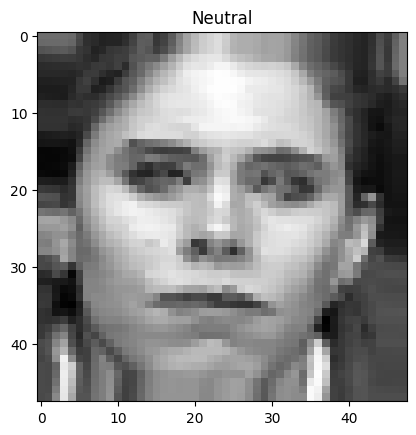

In [14]:
import matplotlib.pyplot as plt
# Snippet to validate data is actually loaded
batch_features, batch_labels = next(train_generator_augmented)
print(batch_features.shape)
print(batch_labels.shape)

# use matplotlib to show the image, add the label as title
plt.title(emotion_map[str(np.argmax(batch_labels[0]))])
plt.imshow(batch_features[0])
plt.show()